##Scrapping Google Apps Review - MyBluebird
Week 2 NLP Pipeline PBA/ Genap 2025/ Irmasari Hafidz irma@its.ac.id

edited by Mohammad Geresidi Rachmadi - 5026221163

In [ ]:
!pip install google_play_scraper
!pip install textblob
!pip install seaborn

In [ ]:
from google_play_scraper import app
import pandas as pd
import numpy as np
import sklearn
import requests
import matplotlib.pyplot as plt
import matplotlib.dates as dates
import seaborn as sns
import textblob
#from wordcloud import WordCloud
from pathlib import Path
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report, accuracy_score

import pickle
import re
import time
import datetime                              # access to %%time, for timing individual notebook cells
import os
from PIL import Image
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

%matplotlib inline
%config InlineBackend.figure_format='retina'

# Import seaborn styles explicitly
import seaborn as sns
# Apply the seaborn style before creating plots
sns.set_style("whitegrid")  # This line sets the Seaborn style

plt.rcParams["figure.figsize"] = (15,10)

In [ ]:
#Android App MyBlueBird  from Google Play at
#https://play.google.com/store/apps/details?id=com.seatech.bluebird&hl=en
#The apps ID found in the link after id=com.seatech.bluebird&hl=en
#The apps name on Google Play titled: MyBlueBird
#Dated 3 March 2025 and N of reviews 787K

from google_play_scraper import app, Sort, reviews_all

mbb_reviews = reviews_all(
    'com.seatech.bluebird',
    sleep_milliseconds=0, # defaults to 0
    lang='en', # defaults to 'en'
    sort=Sort.NEWEST, # defaults to Sort.MOST_RELEVANT
)

In [ ]:
#Save MyBlueBird reviews into dataframe
df_mbbrev = pd.DataFrame(np.array(mbb_reviews),columns=['content'])
df_mbbrev = df_mbbrev.join(pd.DataFrame(df_mbbrev.pop('content').tolist()))
df_mbbrev.to_csv(r'df_mbbrev', index=False)

## Homework TUGAS 1A

NLP Pipeline:
RAW data (save to csv) lakukan:

* Tokenization
* Lowering
* Stopword Removal
* Lemmatization
* Stemming
* Punctuations Removal
* Expand Contractions
* Spelling Correction
* Rare Words Removal
* Common Words Removal

(save as cleandata.csv)
* Frequent words (n=50,100,1000)
* Frequent Words found (new), contoh: yg, bs, tyt
* ditambahkan di stopwords removal
* Stopwords removal (NLTK, misal case study review hanya dalam Indonesia n=758)


In [ ]:
df_mbbrev

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion
0,8ea1b2aa-68b2-4bab-9e90-80ba942d8dd2,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺 otp generation for email verification sucks,1,0,None,2025-08-31 03:00:13,"Dear Mr/Ms hedsett kusutt, apologize for the inconvenience, we will follow up on this report. Please provide a phone number that we can contact via email customercare@bluebirdgroup.com or BEBI liv...",2025-08-31 03:47:13,None
1,595644e1-d84e-49a6-ad1d-fc427b9f5d8c,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"the driver super polite..excellent service, so comfort",5,0,6.18.2,2025-08-30 11:25:35,"Dear Mr. Ahmad Rizki , thank you for the rating :)\nDon't forget to click the following link to find out about our promos https://www.bluebirdgroup.com/promo/ -as-",2025-08-30 13:55:34,6.18.2
2,a833df84-d693-4f6f-b861-8d8dc704b937,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,I cancel the order. and still paying. 👎,2,0,None,2025-08-29 22:37:17,"We’re sorry for the inconvenience you’ve experienced. To assist us in resolving the issue, we kindly ask you to fill out this form: https://www.bluebirdgroup.com/contact-us?lang=en. -ap-",2025-08-29 22:59:34,None
3,182078fd-2dc3-4dab-aa74-90656a0cebdf,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Amazing experience,5,0,6.18.2,2025-08-28 08:54:20,"Dear Mr/Ms Ilmiya Ilham Hakim , thank you for the rating :)\nDon't forget to click the following link to find out about our promos https://www.bluebirdgroup.com/promo/ -Vi-",2025-08-28 08:57:13,6.18.2
4,c85ead8a-6542-4c99-8d34-3139fe84a2a1,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,The abundance of advertisements is quite bothersome.,2,0,6.18.2,2025-08-28 05:31:33,"Dear Mr/Ms DJ Danny Dinani, apologize for the inconvenience, we will follow up on this report. Please provide a phone number that we can contact via email customercare@bluebirdgroup.com or BEBI li...",2025-08-28 05:51:04,6.18.2
...,...,...,...,...,...,...,...,...,...,...,...
9651,2e7a5e6a-e376-47e4-b001-64fe97421afc,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Great app. Sangat membantu.,4,1,1.2.127,2011-12-07 23:57:37,None,NaT,1.2.127
9652,01814132-db78-47a4-914d-efd23e986e40,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Akhirnya setelah di blackberry, dibuat juga aplikasi buat android...semoga semakin jaya blue bird! *two thumbs up*",5,1,1.2.126,2011-12-07 02:58:14,None,NaT,1.2.126
9653,cdc031c1-088a-4619-928c-c7c1cd2d1e75,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,"Pagi jam 4 saya pesan taksi berjalan dengan baik, muncul notifikasi apabila sudah mendapat mobil dan posisi mobil bisa dilacak di petanya. Bagus.",4,2,1.2.126,2011-12-02 22:11:34,None,NaT,1.2.126
9654,4d2cc639-e04a-40f5-86c8-d654a58f0886,A Google user,https://play-lh.googleusercontent.com/EGemoI2NTXmTsBVtJqk8jxF9rh8ApRWfsIMQSt2uE4OcpQqbFu7f7NbTK05lx80nuSijCz7sc3a277R67g,Pertama kali make app ini gw seneng banget karena gw bisa track dari gadget gw udah dimana taksinya. Sayang untuk tujuannya ga bs ganti dari airport?,2,2,1.2.126,2011-11-30 02:24:32,None,NaT,1.2.126


In [ ]:
df_mbbrev.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9656 entries, 0 to 9655
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   reviewId              9656 non-null   object        
 1   userName              9656 non-null   object        
 2   userImage             9656 non-null   object        
 3   content               9650 non-null   object        
 4   score                 9656 non-null   int64         
 5   thumbsUpCount         9656 non-null   int64         
 6   reviewCreatedVersion  8693 non-null   object        
 7   at                    9656 non-null   datetime64[ns]
 8   replyContent          8556 non-null   object        
 9   repliedAt             8556 non-null   datetime64[ns]
 10  appVersion            8693 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 829.9+ KB


In [ ]:
#We do not need data for column reviewId, userName, userImage so
#we will show only these column
df_mbbrev.loc[:,["content","score","thumbsUpCount", "reviewCreatedVersion", "at", "replyContent", "repliedAt"]]

,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt
0,𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺 otp generation for email verification sucks,1,0,None,2025-08-31 03:00:13,"Dear Mr/Ms hedsett kusutt, apologize for the inconvenience, we will follow up on this report. Please provide a phone number that we can contact via email customercare@bluebirdgroup.com or BEBI liv...",2025-08-31 03:47:13
1,"the driver super polite..excellent service, so comfort",5,0,6.18.2,2025-08-30 11:25:35,"Dear Mr. Ahmad Rizki , thank you for the rating :)\nDon't forget to click the following link to find out about our promos https://www.bluebirdgroup.com/promo/ -as-",2025-08-30 13:55:34
2,I cancel the order. and still paying. 👎,2,0,None,2025-08-29 22:37:17,"We’re sorry for the inconvenience you’ve experienced. To assist us in resolving the issue, we kindly ask you to fill out this form: https://www.bluebirdgroup.com/contact-us?lang=en. -ap-",2025-08-29 22:59:34
3,Amazing experience,5,0,6.18.2,2025-08-28 08:54:20,"Dear Mr/Ms Ilmiya Ilham Hakim , thank you for the rating :)\nDon't forget to click the following link to find out about our promos https://www.bluebirdgroup.com/promo/ -Vi-",2025-08-28 08:57:13
4,The abundance of advertisements is quite bothersome.,2,0,6.18.2,2025-08-28 05:31:33,"Dear Mr/Ms DJ Danny Dinani, apologize for the inconvenience, we will follow up on this report. Please provide a phone number that we can contact via email customercare@bluebirdgroup.com or BEBI li...",2025-08-28 05:51:04
...,...,...,...,...,...,...,...
9651,Great app. Sangat membantu.,4,1,1.2.127,2011-12-07 23:57:37,None,NaT
9652,"Akhirnya setelah di blackberry, dibuat juga aplikasi buat android...semoga semakin jaya blue bird! *two thumbs up*",5,1,1.2.126,2011-12-07 02:58:14,None,NaT
9653,"Pagi jam 4 saya pesan taksi berjalan dengan baik, muncul notifikasi apabila sudah mendapat mobil dan posisi mobil bisa dilacak di petanya. Bagus.",4,2,1.2.126,2011-12-02 22:11:34,None,NaT
9654,Pertama kali make app ini gw seneng banget karena gw bisa track dari gadget gw udah dimana taksinya. Sayang untuk tujuannya ga bs ganti dari airport?,2,2,1.2.126,2011-11-30 02:24:32,None,NaT


In [ ]:
#Check number of reviews scores
df_mbbrev['score'].value_counts()

,count
score,
5,3906
1,3163
2,944
4,848
3,795


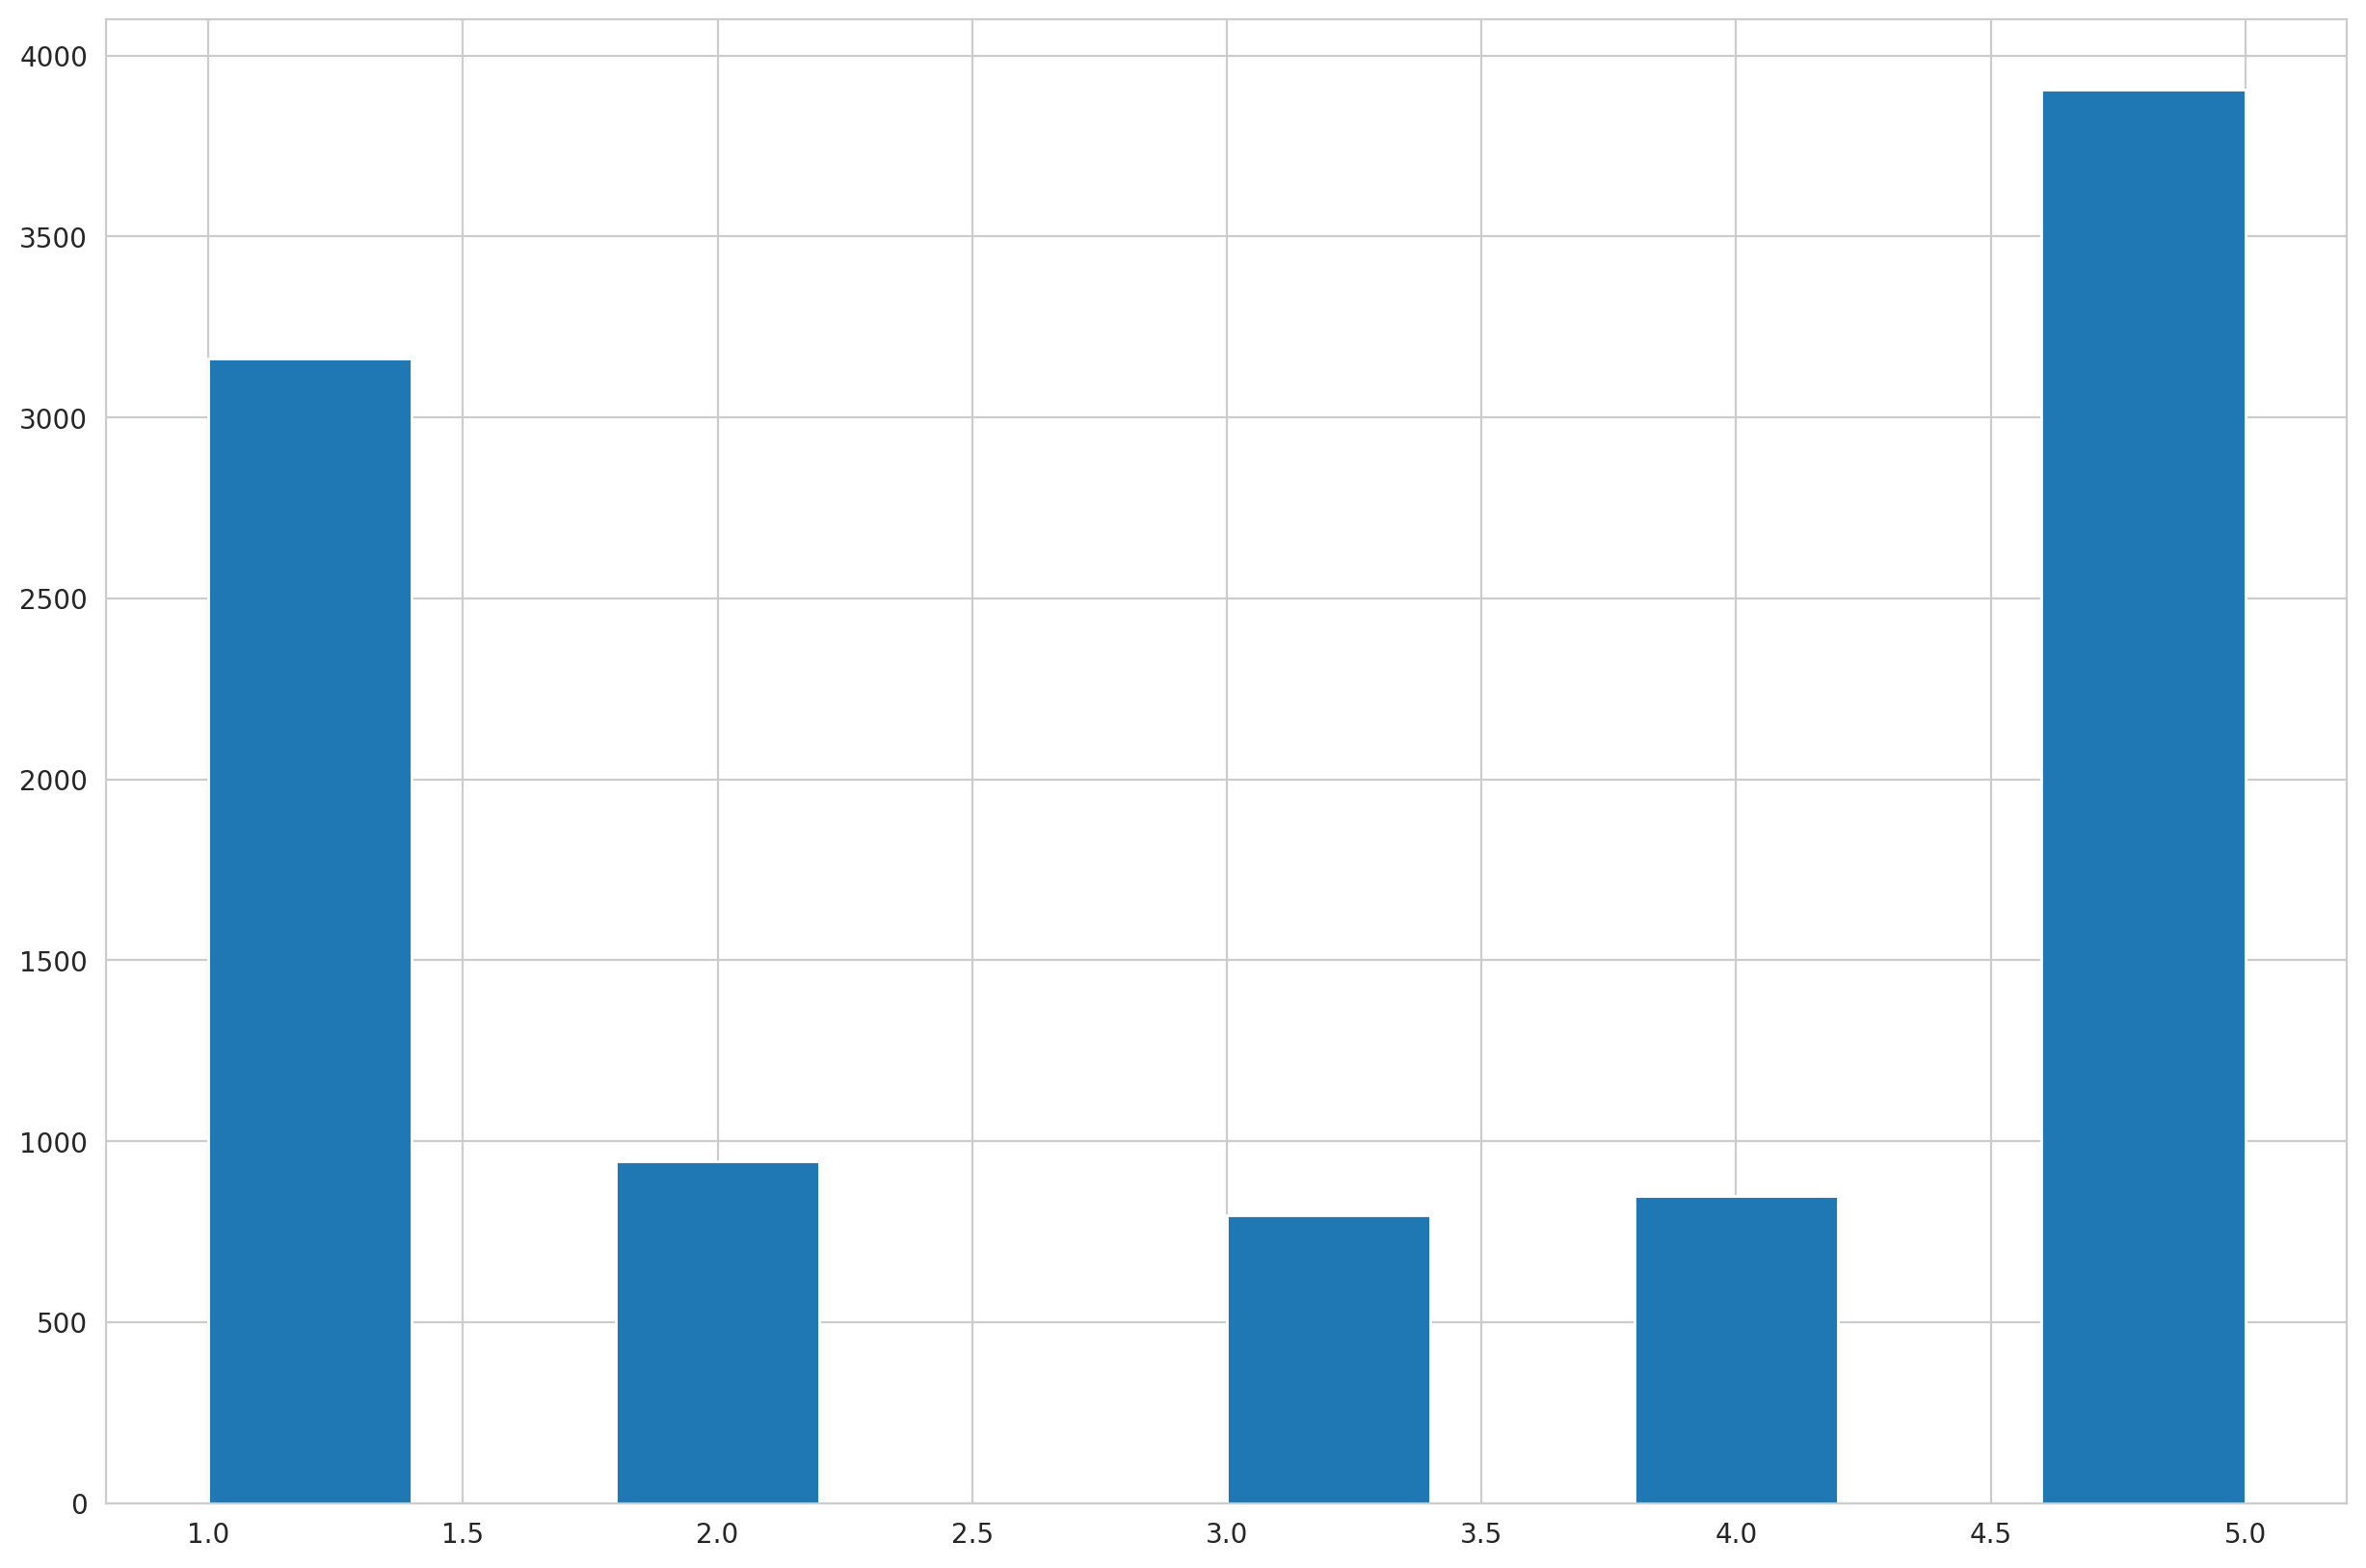

In [ ]:
plt.hist(df_mbbrev['score'])
plt.show()

In [ ]:
!pip install emoji

import numpy as np
import pandas as pd
pd.set_option("display.max_colwidth", 200)
#from pandas_profiling import ProfileReport
import regex
import nltk
import wordcloud
import textblob

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob

import string
import re
import emoji

In [ ]:
#Creating polarity on the column: content (review from the apps) using TextBlob
#Read https://textblob.readthedocs.io/en/dev/quickstart.html

from textblob import TextBlob
# Handle None values in 'content' column by replacing them with empty strings
df_mbbrev['sentiment_polarity'] = df_mbbrev['content'].astype(str).apply(lambda x: TextBlob(x).polarity)
df_mbbrev['sentiment_subjective'] = df_mbbrev['content'].astype(str).apply(lambda x: TextBlob(x).subjectivity)

In [ ]:
df_mbbrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective"]]

,content,score,sentiment_polarity,sentiment_subjective
0,𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺 otp generation for email verification sucks,1,-0.300000,0.300000
1,"the driver super polite..excellent service, so comfort",5,0.333333,0.666667
2,I cancel the order. and still paying. 👎,2,0.000000,0.000000
3,Amazing experience,5,0.600000,0.900000
4,The abundance of advertisements is quite bothersome.,2,0.000000,0.000000
...,...,...,...,...
9651,Great app. Sangat membantu.,4,0.800000,0.750000
9652,"Akhirnya setelah di blackberry, dibuat juga aplikasi buat android...semoga semakin jaya blue bird! *two thumbs up*",5,0.000000,0.100000
9653,"Pagi jam 4 saya pesan taksi berjalan dengan baik, muncul notifikasi apabila sudah mendapat mobil dan posisi mobil bisa dilacak di petanya. Bagus.",4,0.000000,0.000000
9654,Pertama kali make app ini gw seneng banget karena gw bisa track dari gadget gw udah dimana taksinya. Sayang untuk tujuannya ga bs ganti dari airport?,2,0.000000,0.000000


## Lowercasing

In [ ]:
#DATA PREPROCESSING
# Lower casing
# Change the reviews type to string
df_mbbrev['content'] = df_mbbrev['content'].astype(str)# Before lowercasing
# Before lowercasing
print(df_mbbrev['content'][0])
print(df_mbbrev['content'][4828])
print(df_mbbrev['content'][9655])

𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺 otp generation for email verification sucks
easy to use
When you cant order taxi by phone, this apps is the answer!


In [ ]:
#Lowercase all reviews to see the difference
df_mbbrev['content']= df_mbbrev['content'].apply(lambda x: x.lower())
print(df_mbbrev['content'][0])
print(df_mbbrev['content'][4828])
print(df_mbbrev['content'][9655])

𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺 otp generation for email verification sucks
easy to use
when you cant order taxi by phone, this apps is the answer!


##Stopwords Removal
Indonesian Stopwords

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get Indonesian stopwords
indonesian_stopwords = stopwords.words('indonesian')

# Display first 20 stopwords
print(indonesian_stopwords[:20])

['ada', 'adalah', 'adanya', 'adapun', 'agak', 'agaknya', 'agar', 'akan', 'akankah', 'akhir', 'akhiri', 'akhirnya', 'aku', 'akulah', 'amat', 'amatlah', 'anda', 'andalah', 'antar', 'antara']


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

df_mbbrev['wordCount'] = [len(review.split()) for review in df_mbbrev['content']]
df_mbbrev['uppercaseCharCount'] = [sum(char.isupper() for char in review) \
                              for review in df_mbbrev['content']]
df_mbbrev['specialCharCount'] = [sum(char in string.punctuation for char in review) \
                            for review in df_mbbrev['content']]

In [ ]:
df_mbbrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","wordCount","uppercaseCharCount","specialCharCount"]]

,content,score,sentiment_polarity,sentiment_subjective,wordCount,uppercaseCharCount,specialCharCount
0,𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺 otp generation for email verification sucks,1,-0.300000,0.300000,7,0,0
1,"the driver super polite..excellent service, so comfort",5,0.333333,0.666667,7,0,3
2,i cancel the order. and still paying. 👎,2,0.000000,0.000000,8,0,2
3,amazing experience,5,0.600000,0.900000,2,0,0
4,the abundance of advertisements is quite bothersome.,2,0.000000,0.000000,7,0,1
...,...,...,...,...,...,...,...
9651,great app. sangat membantu.,4,0.800000,0.750000,4,0,2
9652,"akhirnya setelah di blackberry, dibuat juga aplikasi buat android...semoga semakin jaya blue bird! *two thumbs up*",5,0.000000,0.100000,16,0,7
9653,"pagi jam 4 saya pesan taksi berjalan dengan baik, muncul notifikasi apabila sudah mendapat mobil dan posisi mobil bisa dilacak di petanya. bagus.",4,0.000000,0.000000,23,0,3
9654,pertama kali make app ini gw seneng banget karena gw bisa track dari gadget gw udah dimana taksinya. sayang untuk tujuannya ga bs ganti dari airport?,2,0.000000,0.000000,26,0,2


In [ ]:
#Add a column name polarity_rating from changing the score of the review into 3 labels: Pos, Negative Neutral
df_mbbrev['sentiment_rating'] = df_mbbrev['score'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3  else 'Negative'))

In [ ]:
df_mbbrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺 otp generation for email verification sucks,1,-0.300000,0.300000,Negative
1,"the driver super polite..excellent service, so comfort",5,0.333333,0.666667,Positive
2,i cancel the order. and still paying. 👎,2,0.000000,0.000000,Negative
3,amazing experience,5,0.600000,0.900000,Positive
4,the abundance of advertisements is quite bothersome.,2,0.000000,0.000000,Negative
...,...,...,...,...,...
9651,great app. sangat membantu.,4,0.800000,0.750000,Positive
9652,"akhirnya setelah di blackberry, dibuat juga aplikasi buat android...semoga semakin jaya blue bird! *two thumbs up*",5,0.000000,0.100000,Positive
9653,"pagi jam 4 saya pesan taksi berjalan dengan baik, muncul notifikasi apabila sudah mendapat mobil dan posisi mobil bisa dilacak di petanya. bagus.",4,0.000000,0.000000,Positive
9654,pertama kali make app ini gw seneng banget karena gw bisa track dari gadget gw udah dimana taksinya. sayang untuk tujuannya ga bs ganti dari airport?,2,0.000000,0.000000,Negative


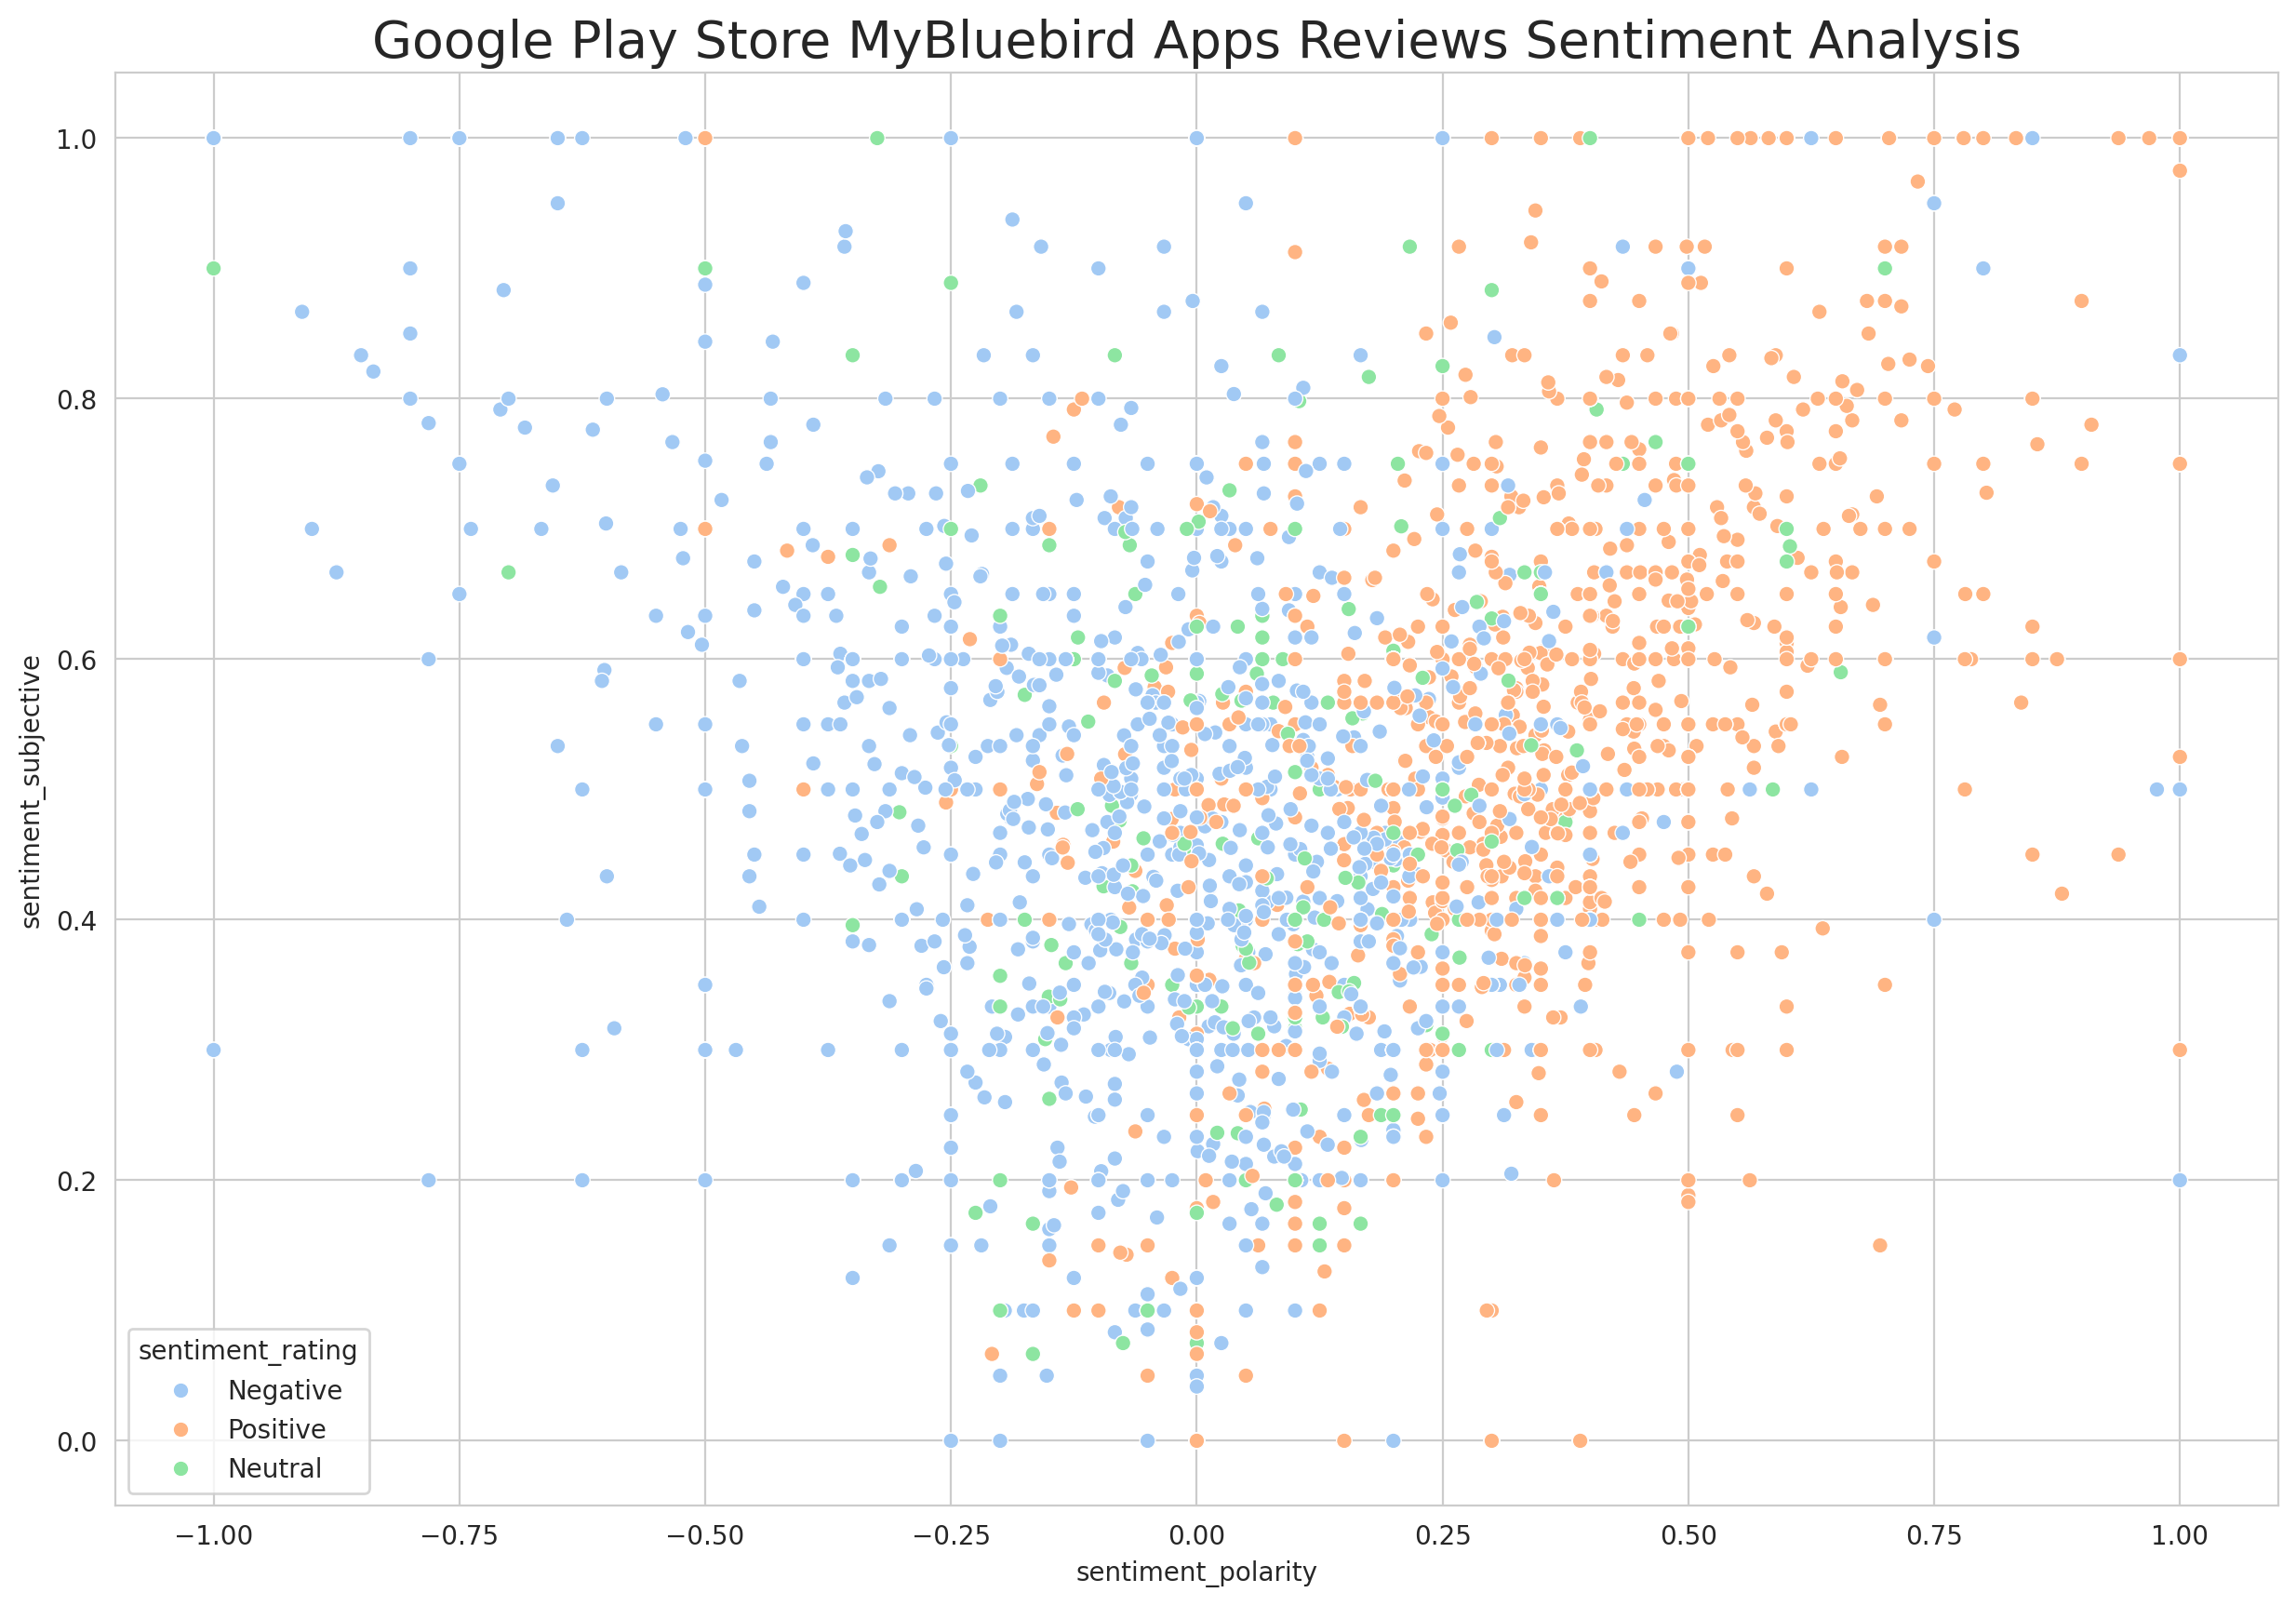

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 10))
# Specify x and y using the 'x' and 'y' parameters within sns.scatterplot
sns.scatterplot(x=df_mbbrev['sentiment_polarity'], y=df_mbbrev['sentiment_subjective'],
                hue=df_mbbrev['sentiment_rating'], edgecolor='white', palette="pastel")
plt.title("Google Play Store MyBluebird Apps Reviews Sentiment Analysis", fontsize=20)
plt.show()

In [ ]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

/tmp/ipython-input-2152088084.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


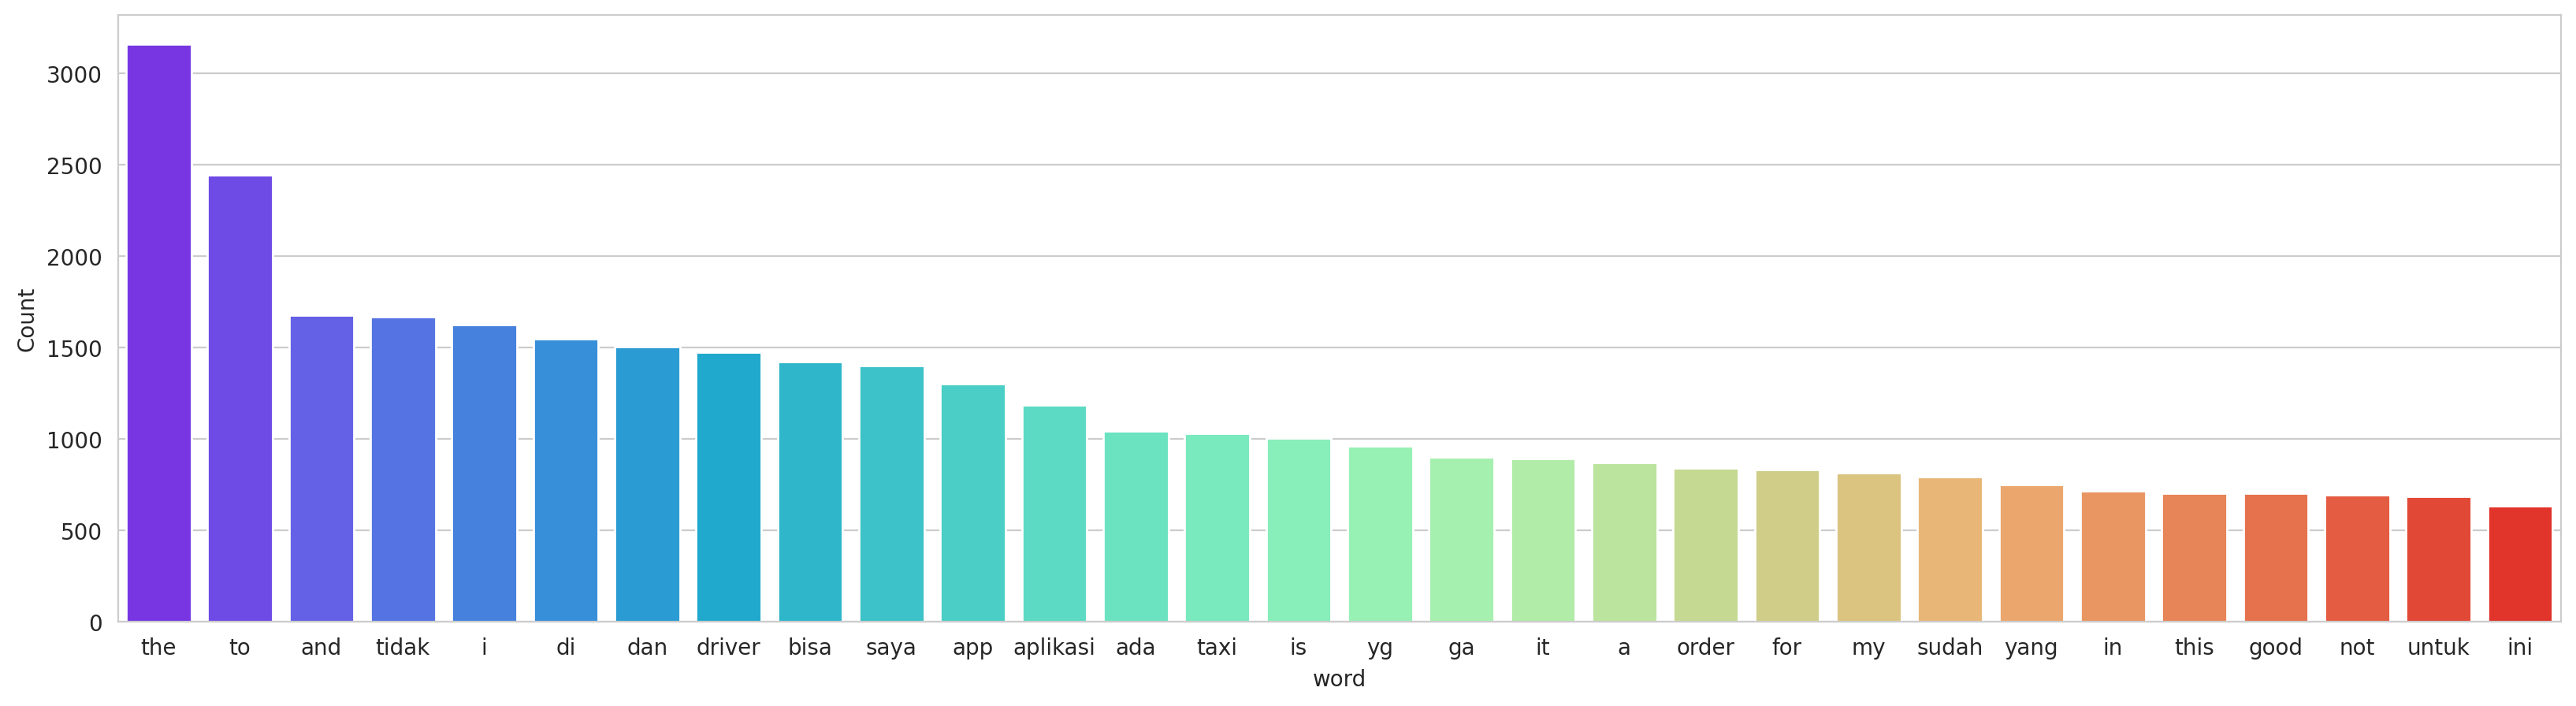

In [ ]:
freq_words(df_mbbrev['content'])

In [ ]:
# prompt: the [content] column hasnt been applied Indonesian stopwords removal using Sastrawi

!pip install Sastrawi

from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

# Create stopword remover
factory = StopWordRemoverFactory()
stopword_remover = factory.create_stop_word_remover()

# Apply stopword removal to the 'content' column
df_mbbrev['content'] = df_mbbrev['content'].apply(lambda x: stopword_remover.remove(x))


In [ ]:
# prompt: can you also apply English stopwords as well to the [content] column

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

# Get English stopwords
english_stopwords = stopwords.words('english')

# Assuming df_mbbrev is your DataFrame and 'content' is the column
df_mbbrev['content'] = df_mbbrev['content'].apply(lambda x: ' '.join([word for word in x.split() if word not in english_stopwords]))


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
len(english_stopwords)

198

In [ ]:
df_mbbrev.loc[:,["content","score","sentiment_polarity", "sentiment_subjective","sentiment_rating"]]

,content,score,sentiment_polarity,sentiment_subjective,sentiment_rating
0,𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺𓂺 otp generation email verification sucks,1,-0.300000,0.300000,Negative
1,"driver super polite..excellent service, comfort",5,0.333333,0.666667,Positive
2,cancel order. still paying. 👎,2,0.000000,0.000000,Negative
3,amazing experience,5,0.600000,0.900000,Positive
4,abundance advertisements quite bothersome.,2,0.000000,0.000000,Negative
...,...,...,...,...,...
9651,great app. sangat membantu.,4,0.800000,0.750000,Positive
9652,"akhirnya di blackberry, dibuat aplikasi buat android...semoga semakin jaya blue bird! *two thumbs up*",5,0.000000,0.100000,Positive
9653,"pagi jam 4 pesan taksi berjalan baik, muncul notifikasi apabila mendapat mobil posisi mobil dilacak petanya. bagus.",4,0.000000,0.000000,Positive
9654,pertama kali make app gw seneng banget gw track gadget gw udah taksinya. sayang tujuannya ga bs ganti airport?,2,0.000000,0.000000,Negative


In [ ]:
# function to plot most frequent terms
def freq_words(x, terms = 30):
  all_words = ' '.join([text for text in x])
  all_words = all_words.split()
  #Import FreqDist from nltk.probability
  from nltk.probability import FreqDist
  fdist = FreqDist(all_words)
  words_df = pd.DataFrame({'word':list(fdist.keys()), 'count':list(fdist.values())})

  # selecting top 20 most frequent words
  d = words_df.nlargest(columns="count", n = terms)
  plt.figure(figsize=(20,5))
  # Use the 'rainbow' colormap for the bar plot
  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")
  ax.set(ylabel = 'Count')
  plt.show()

/tmp/ipython-input-2152088084.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=d, x= "word", y = "count", palette="rainbow")


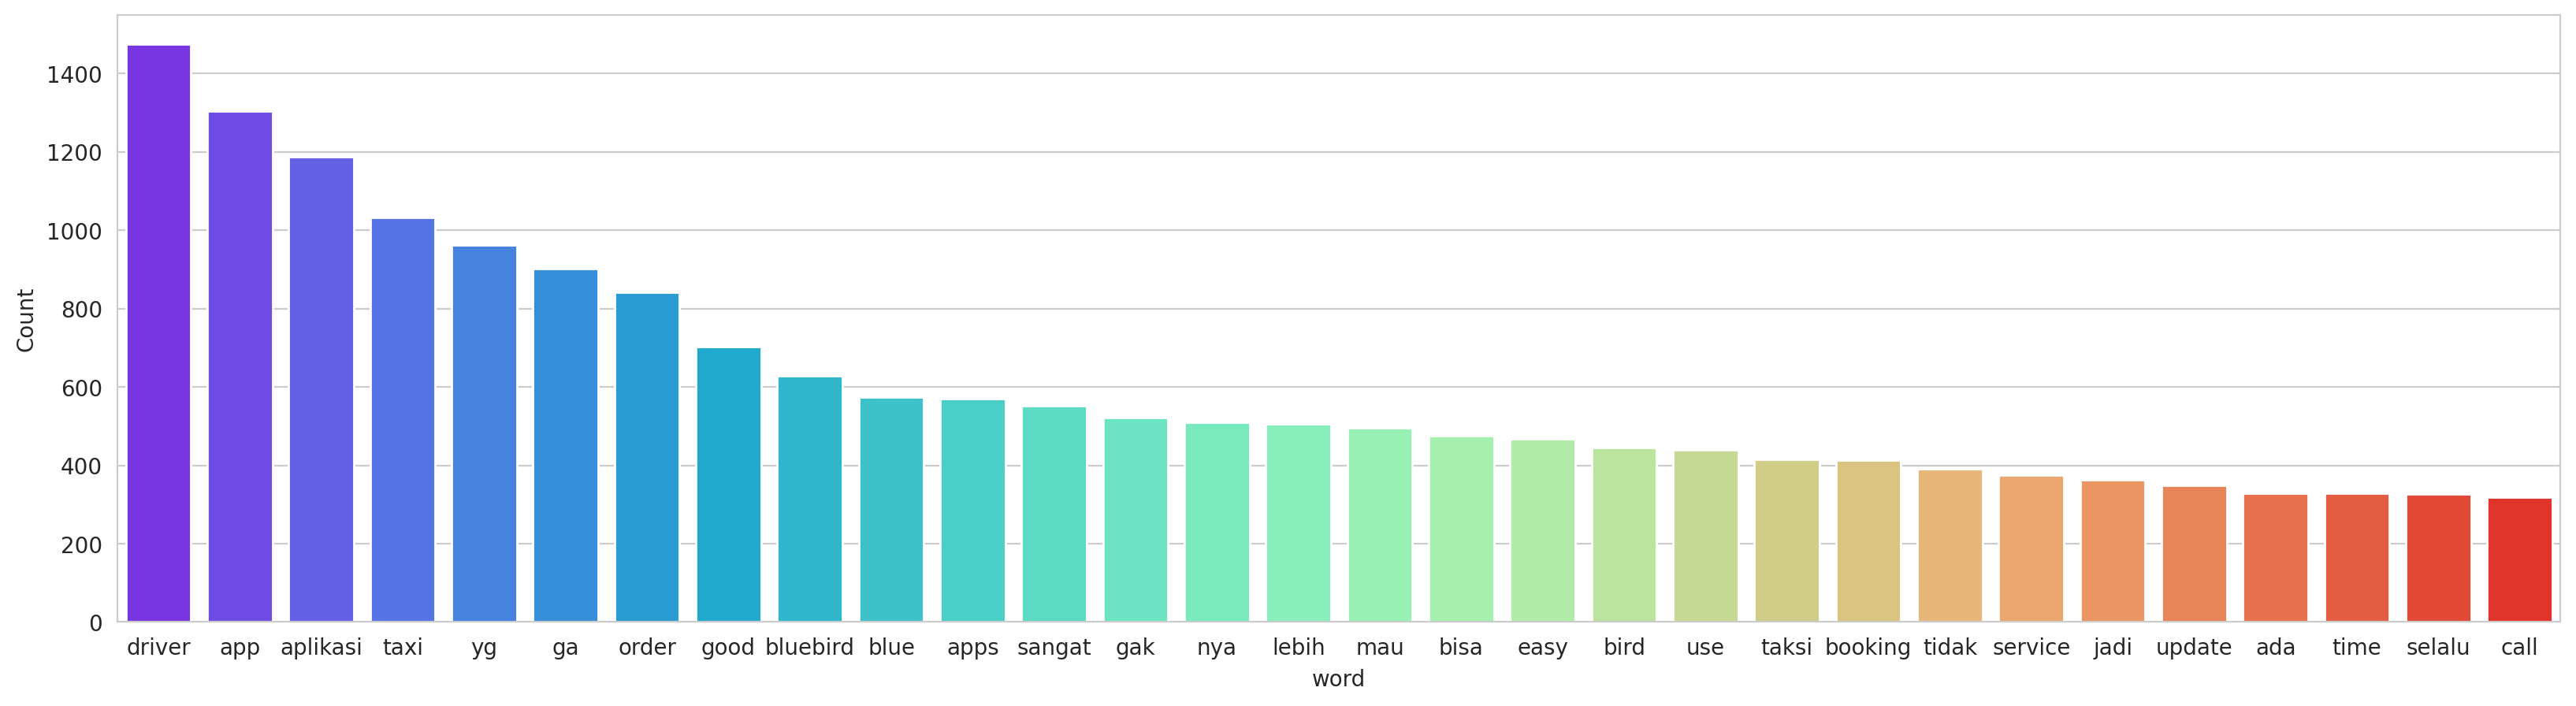

In [ ]:
freq_words(df_mbbrev['content'])

In [ ]:
#Count after stopwords
#edited from https://www.tensorscience.com/nlp/sentiment-analysis-tutorial-in-python-classifying-reviews-on-movies-and-products
import string

df_mbbrev['wordCount'] = [len(review.split()) for review in df_mbbrev['content']]
df_mbbrev['wordCount_after_stopwords'] = [len(review.split()) for review in df_mbbrev['content']]